-------------------------------------------------------------------------------------------------------------------
# 1. Import library
-------------------------------------------------------------------------------------------------------------------

In [68]:
# Dataframe manipulation
import numpy as np
import pandas as pd
from math import sqrt

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
# sns.set(style = 'whitegrid',context = 'notebook')

# Preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Imputer, LabelEncoder

# Modelling Helpers:
from sklearn.preprocessing import Imputer, Normalizer, scale
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score, ShuffleSplit, cross_validate
from sklearn import model_selection
from sklearn.model_selection import train_test_split

# statsmodels
import pylab
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels as statm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
import math

# Classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
# Evaluation metrics for Classification
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score

# Regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV,ElasticNet,LogisticRegression
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
# Evaluation metrics for Regression 
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score, mean_absolute_error

# Configuration
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)

# Supress warnings
import warnings
warnings.filterwarnings("ignore")

print("Setup complete...")

Setup complete...


# 2. Common function

In [151]:
# helper function for plotting residual plots
def plot_residual(ax1, ax2, ax3, ax4, y_pred, y_real, line_label, title):
    ax1.scatter(y_pred, y_real, color='blue',alpha=0.6,label=line_label)
    ax1.set_xlabel('Predicted Y') 
    ax1.set_ylabel('Real Y')
    ax1.legend(loc='best')
    ax1.set_title(title)

    ax2.scatter(y_pred,y_real - y_pred, color='green',marker='x',alpha=0.6,label='Residual')
    ax2.set_xlabel('Predicted Y')
    ax2.set_ylabel('Residual')    
    ax2.axhline(y=0, color='black', linewidth=2.0, alpha=0.7, label='y=0')
    ax2.legend(loc='best')
    ax2.set_title('Residual Plot')
    
    ax3.hist(y_real - y_pred, bins=30, color='green', alpha=0.7)
    ax3.set_title('Histogram of residual values')
    
    stats.probplot(y_real - y_pred, plot=ax4)
    ax4.set_title('Probability of residual values')
    
    return ax1, ax2, ax3, ax4

-------------------------------------------------------------------------------------------------------------------
# 2. Import dataset
-------------------------------------------------------------------------------------------------------------------

In [4]:
train_df = pd.read_csv('preprocessed_train_v02.csv')
test_df = pd.read_csv('preprocessed_test_v02.csv')

train_df.head()

,id,cleaning_fee,review_scores_value,review_scores_location,review_scores_checkin,review_scores_accuracy,review_scores_communication,review_scores_cleanliness,review_scores_rating,reviews_per_month,bathrooms,beds,bedrooms,host_total_listings_count,host_listings_count,longitude,number_of_reviews,availability_365,availability_90,availability_60,availability_30,maximum_nights,minimum_nights,extra_people,guests_included,accommodates,calculated_host_listings_count,latitude,price
0,26581320,0.057003,1.000,1.0,1.000,1.0,1.0,1.000,1.000,0.026586,0.071429,0.043478,0.022727,0.023585,0.023585,0.564347,0.003460,0.000000,0.000000,0.000000,0.000000,5.234033e-07,0.000000,0.000000,0.000000,0.052632,0.031336,0.759846,55.0
1,28323093,0.032573,1.000,1.0,1.000,1.0,1.0,1.000,1.000,0.059819,0.107143,0.043478,0.022727,0.004043,0.004043,0.574343,0.000000,0.038356,0.155556,0.233333,0.000000,5.234033e-07,0.001779,0.021277,0.000000,0.000000,0.001843,0.608466,30.0
2,30575629,0.244300,1.000,1.0,1.000,1.0,1.0,1.000,1.000,0.059819,0.142857,0.086957,0.045455,0.006739,0.006739,0.461781,0.000000,0.345205,0.900000,0.850000,0.700000,5.234033e-07,0.000890,0.063830,0.043478,0.157895,0.008295,0.576140,1000.0
3,20313438,0.048860,1.000,1.0,1.000,1.0,1.0,1.000,1.000,0.059819,0.071429,0.086957,0.045455,0.000674,0.000674,0.393664,0.000000,0.339726,0.377778,0.066667,0.000000,5.234033e-07,0.000890,0.000000,0.000000,0.157895,0.000000,0.473692,101.0
4,26395171,0.065147,0.875,1.0,0.875,1.0,1.0,0.875,0.925,0.163142,0.071429,0.043478,0.000000,0.000674,0.000674,0.469141,0.024221,0.035616,0.144444,0.216667,0.433333,5.234033e-07,0.000890,0.212766,0.043478,0.052632,0.000000,0.502570,110.0


In [7]:
print(train_df.shape)
print(test_df.shape)

(69356, 29)
(7707, 29)


-------------------------------------------------------------------------------------------------------------------
# 3. Construct X & y
-------------------------------------------------------------------------------------------------------------------

In [53]:
# capture the target
# y_train = pd.Series(np.log(train_df['price']))
# y_test = pd.Series(np.log(test_df['price']))
y_train = pd.Series(train_df['price'])
y_test = pd.Series(test_df['price'])

In [54]:
removed_list = ['id','price']
# load selected features
features = pd.read_csv('selected_features.csv', header=None)
features = [x for x in features[0]] 
selected_features = [var for var in features if var not in removed_list]

In [55]:
# reduce the train and test set to the desired features
X_train = train_df[selected_features]
X_test = test_df[selected_features]

In [56]:
X_train.head()

,cleaning_fee,review_scores_value,review_scores_location,review_scores_checkin,review_scores_accuracy,review_scores_communication,review_scores_cleanliness,review_scores_rating,reviews_per_month,bathrooms,beds,bedrooms,host_total_listings_count,host_listings_count,longitude,number_of_reviews,availability_365,availability_90,availability_60,availability_30,maximum_nights,minimum_nights,extra_people,guests_included,accommodates,calculated_host_listings_count,latitude
0,0.057003,1.000,1.0,1.000,1.0,1.0,1.000,1.000,0.026586,0.071429,0.043478,0.022727,0.023585,0.023585,0.564347,0.003460,0.000000,0.000000,0.000000,0.000000,5.234033e-07,0.000000,0.000000,0.000000,0.052632,0.031336,0.759846
1,0.032573,1.000,1.0,1.000,1.0,1.0,1.000,1.000,0.059819,0.107143,0.043478,0.022727,0.004043,0.004043,0.574343,0.000000,0.038356,0.155556,0.233333,0.000000,5.234033e-07,0.001779,0.021277,0.000000,0.000000,0.001843,0.608466
2,0.244300,1.000,1.0,1.000,1.0,1.0,1.000,1.000,0.059819,0.142857,0.086957,0.045455,0.006739,0.006739,0.461781,0.000000,0.345205,0.900000,0.850000,0.700000,5.234033e-07,0.000890,0.063830,0.043478,0.157895,0.008295,0.576140
3,0.048860,1.000,1.0,1.000,1.0,1.0,1.000,1.000,0.059819,0.071429,0.086957,0.045455,0.000674,0.000674,0.393664,0.000000,0.339726,0.377778,0.066667,0.000000,5.234033e-07,0.000890,0.000000,0.000000,0.157895,0.000000,0.473692
4,0.065147,0.875,1.0,0.875,1.0,1.0,0.875,0.925,0.163142,0.071429,0.043478,0.000000,0.000674,0.000674,0.469141,0.024221,0.035616,0.144444,0.216667,0.433333,5.234033e-07,0.000890,0.212766,0.043478,0.052632,0.000000,0.502570


In [57]:
X_test.head()

,cleaning_fee,review_scores_value,review_scores_location,review_scores_checkin,review_scores_accuracy,review_scores_communication,review_scores_cleanliness,review_scores_rating,reviews_per_month,bathrooms,beds,bedrooms,host_total_listings_count,host_listings_count,longitude,number_of_reviews,availability_365,availability_90,availability_60,availability_30,maximum_nights,minimum_nights,extra_people,guests_included,accommodates,calculated_host_listings_count,latitude
0,0.040717,1.0,1.000,1.0,1.0,1.0,1.0,1.000,0.016314,0.071429,0.043478,0.022727,0.000674,0.000674,0.582523,0.010381,0.567123,0.166667,0.250000,0.233333,1.257285e-08,0.001779,0.106383,0.043478,0.052632,0.000000,0.445733
1,0.048860,1.0,1.000,1.0,1.0,1.0,1.0,1.000,0.099698,0.071429,0.043478,0.000000,0.001348,0.001348,0.224735,0.015571,0.950685,0.800000,0.700000,0.533333,5.234033e-07,0.002669,0.000000,0.000000,0.000000,0.000922,0.742195
2,0.048860,1.0,1.000,1.0,1.0,1.0,1.0,0.875,0.090634,0.071429,0.043478,0.022727,0.001348,0.001348,0.260639,0.036332,0.016438,0.066667,0.000000,0.000000,5.234033e-07,0.000000,0.000000,0.000000,0.052632,0.000000,0.286432
3,0.008143,1.0,0.875,1.0,1.0,1.0,1.0,0.975,0.207251,0.071429,0.043478,0.022727,0.000674,0.000674,0.662139,0.019031,0.432877,0.755556,0.633333,0.266667,1.350418e-08,0.000000,0.042553,0.000000,0.052632,0.000000,0.644919
4,0.016287,1.0,1.000,1.0,1.0,1.0,1.0,1.000,0.059819,0.071429,0.130435,0.022727,0.001348,0.001348,0.364195,0.000000,1.000000,1.000000,1.000000,1.000000,5.234033e-07,0.000890,0.063830,0.043478,0.105263,0.000000,0.395158


-------------------------------------------------------------------------------------------------------------------
# 4. Model Development
-------------------------------------------------------------------------------------------------------------------

## Multiple Linear Regression 1

### 1. Train model

In [121]:
import statsmodels.api as sm
X_train_LR = sm.add_constant(X_train)
X_test_LR = sm.add_constant(X_test)
model = sm.OLS(y_train, X_train_LR)
results = model.fit()

### 2. Result

#### model coefficients

In [104]:
# model.params

#### Summary of fitted model

In [122]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.195
Model:                            OLS   Adj. R-squared:                  0.195
Method:                 Least Squares   F-statistic:                     646.2
Date:                Fri, 06 Mar 2020   Prob (F-statistic):               0.00
Time:                        14:45:28   Log-Likelihood:            -4.4812e+05
No. Observations:               69356   AIC:                         8.963e+05
Df Residuals:                   69329   BIC:                         8.965e+05
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                            -96.2182      8.591    -11.200      0.000    -113.056     -79.381
cleaning_fee                     166.2544     13.148     12.645      0.000     140.485     192.024
review_scores_value              -56.5681      9.384     -6.028      0.000     -74.960     -38.176
review_scores_location           124.6005      7.731     16.117      0.000     109.448     139.753
review_scores_checkin             -2.6790      9.530     -0.281      0.779     -21.358      16.001
review_scores_accuracy           -18.4474      9.727     -1.897      0.058     -37.512       0.617
review_scores_communication      -29.5102     10.421     -2.832      0.005     -49.935      -9.086
review_scores_cleanliness         47.2849      7.342      6.440      0.000      32.894      61.676
review_scores_rating              52.7977     11.384      4.638      0.000      30.484      75.111
reviews_per_month                -45.2796      9.295     -4.871      0.000     -63.499     -27.061
bathrooms                        504.0930     16.524     30.507      0.000     471.706     536.480
beds                             -94.3809     19.977     -4.724      0.000    -133.537     -55.225
bedrooms                         580.4400     49.084     11.826      0.000     484.236     676.644
host_total_listings_count         94.7077      8.489     11.157      0.000      78.070     111.346
host_listings_count               94.7077      8.489     11.157      0.000      78.070     111.346
longitude                        -56.0649      5.155    -10.876      0.000     -66.169     -45.961
number_of_reviews                -77.9287     12.718     -6.128      0.000    -102.855     -53.002
availability_365                  14.4178      2.395      6.019      0.000       9.723      19.113
availability_90                    0.2837      8.206      0.035      0.972     -15.800      16.367
availability_60                   -3.3464     10.473     -0.320      0.749     -23.874      17.181
availability_30                   38.0221      4.671      8.140      0.000      28.867      47.178
maximum_nights                   -35.9408    102.581     -0.350      0.726    -237.000     165.118
minimum_nights                    89.4655     47.233      1.894      0.058      -3.110     182.041
extra_people                     -28.8159     10.879     -2.649      0.008     -50.138      -7.494
guests_included                  160.6104     13.295     12.081      0.000     134.553     186.668
accommodates                     361.1357     11.428     31.600      0.000     338.736     383.535
calculated_host_listings_count   -86.2029     15.957     -5.402      0.000    -117.479     -54.927
latitude                           2.8961      4.994      0.580      0.562      -6.892      12.684
==============

### 3. Prediction

### 4. Evaluate the model

#### Calculate rsquared

In [119]:
#model.rsquared

#### MSE and RMSE

#### Visualize the predicted output and true label

#### Distribution of the errors

### 5. Feature importance

-------------------------------------------------------------------------------------------------------------------

## Multiple Linear Regression 2

### 1. Train model

In [32]:
import statsmodels.formula.api as smf
features = X_train.columns.values
formula = f'price ~ {"+".join(features)}'
train_df = pd.concat([X_train,y_train], axis = 1)
model = smf.ols(formula = formula,data=train_df).fit()

### 2. Result

#### Print the coefficient

In [33]:
model.params

Intercept                         -96.218222
cleaning_fee                      166.254389
review_scores_value               -56.568103
review_scores_location            124.600520
review_scores_checkin              -2.678985
review_scores_accuracy            -18.447445
review_scores_communication       -29.510247
review_scores_cleanliness          47.284905
review_scores_rating               52.797716
reviews_per_month                 -45.279595
bathrooms                         504.093017
beds                              -94.380886
bedrooms                          580.440008
host_total_listings_count          94.707680
host_listings_count                94.707680
longitude                         -56.064905
number_of_reviews                 -77.928669
availability_365                   14.417754
availability_90                     0.283742
availability_60                    -3.346416
availability_30                    38.022082
maximum_nights                    -35.940818
minimum_ni

#### Print the summary of fitted model

In [34]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.195
Model:                            OLS   Adj. R-squared:                  0.195
Method:                 Least Squares   F-statistic:                     646.2
Date:                Tue, 10 Mar 2020   Prob (F-statistic):               0.00
Time:                        13:28:55   Log-Likelihood:            -4.4812e+05
No. Observations:               69356   AIC:                         8.963e+05
Df Residuals:                   69329   BIC:                         8.965e+05
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                        -96.2182      8.591    -11.200      0.000    -113.056     -79.381
cleaning_fee                     166.2544     13.148     12.645      0.000     140.485     192.024
review_scores_value              -56.5681      9.384     -6.028      0.000     -74.960     -38.176
review_scores_location           124.6005      7.731     16.117      0.000     109.448     139.753
review_scores_checkin             -2.6790      9.530     -0.281      0.779     -21.358      16.001
review_scores_accuracy           -18.4474      9.727     -1.897      0.058     -37.512       0.617
review_scores_communication      -29.5102     10.421     -2.832      0.005     -49.935      -9.086
review_scores_cleanliness         47.2849      7.342      6.440      0.000      32.894      61.676
review_scores_rating              52.7977     11.384      4.638      0.000      30.484      75.111
reviews_per_month                -45.2796      9.295     -4.871      0.000     -63.499     -27.061
bathrooms                        504.0930     16.524     30.507      0.000     471.706     536.480
beds                             -94.3809     19.977     -4.724      0.000    -133.537     -55.225
bedrooms                         580.4400     49.084     11.826      0.000     484.236     676.644
host_total_listings_count         94.7077      8.489     11.157      0.000      78.070     111.346
host_listings_count               94.7077      8.489     11.157      0.000      78.070     111.346
longitude                        -56.0649      5.155    -10.876      0.000     -66.169     -45.961
number_of_reviews                -77.9287     12.718     -6.128      0.000    -102.855     -53.002
availability_365                  14.4178      2.395      6.019      0.000       9.723      19.113
availability_90                    0.2837      8.206      0.035      0.972     -15.800      16.367
availability_60                   -3.3464     10.473     -0.320      0.749     -23.874      17.181
availability_30                   38.0221      4.671      8.140      0.000      28.867      47.178
maximum_nights                   -35.9408    102.581     -0.350      0.726    -237.000     165.118
minimum_nights                    89.4655     47.233      1.894      0.058      -3.110     182.041
extra_people                     -28.8159     10.879     -2.649      0.008     -50.138      -7.494
guests_included                  160.6104     13.295     12.081      0.000     134.553     186.668
accommodates                     361.1357     11.428     31.600      0.000     338.736     383.535
calculated_host_listings_count   -86.2029     15.957     -5.402      0.000    -117.479     -54.927
latitude                           2.8961      4.994      0.580      0.562      -6.892      12.684
==============

### 3. Prediction

In [35]:
pred_train = model.predict(X_train)
print('Train prediction: ',list(pred_train[0:5]))
print('Train true label: ',list(y_train[0:5]))
print()
pred_test = model.predict(X_test)
print('Test prediction: ',list(pred_test[0:5]))
print('Test true label: ',list(y_test[0:5]))
print()
print('Average house price: ', y_train.median())

Train prediction:  [65.69242852197779, 56.59634242650577, 216.94578456564798, 122.16996470333646, 63.780255362693765]
Train true label:  [55.0, 30.0, 1000.0, 101.0, 110.0]

Test prediction:  [79.67920099217227, 77.3927674046651, 66.67850027603694, 37.07553361507988, 131.74311032128395]
Test true label:  [35.0, 28.0, 30.0, 30.0, 150.0]

Average house price:  80.0


### 4. Evaluate the model

#### Calculate r-square

In [36]:
model.rsquared

0.19507196728056042

#### MSE and RMSE

In [37]:
print('linear train mse: {}'.format(mean_squared_error(y_train, pred_train)))
print('linear train rmse: {}'.format(sqrt(mean_squared_error(y_train, pred_train))))
print()
print('linear test mse: {}'.format(mean_squared_error(y_test,pred_test)))
print('linear test rmse: {}'.format(sqrt(mean_squared_error(y_test, pred_test))))

linear train mse: 23964.37289445384
linear train rmse: 154.8043051547787

linear test mse: 28799.68200667751
linear test rmse: 169.70469058537395


#### Visualize the predicted output and true label

Text(0.5, 1.0, 'Evaluation of Lasso Predictions')

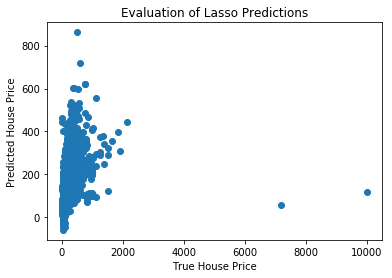

In [38]:
# let's evaluate our predictions respect to the original price
plt.scatter(y_test, model.predict(X_test))
plt.xlabel('True House Price')
plt.ylabel('Predicted House Price')
plt.title('Evaluation of Lasso Predictions')

#### Distribution of errors 

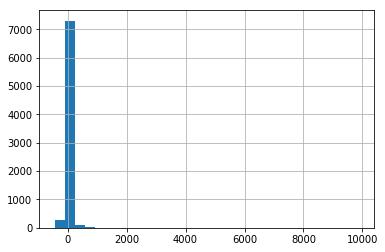

In [39]:
errors = y_test - model.predict(X_test)
errors.hist(bins=30)

### Feature Importance

-------------------------------------------------------------------------------------------------------------------

## Lasso regression model

### 1. Train the model

In [40]:
model = Lasso(alpha=0.005, random_state=0) # remember to set the random_state / seed
model.fit(X_train, y_train)

Lasso(alpha=0.005, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=0,
   selection='cyclic', tol=0.0001, warm_start=False)

### 2. Result

### 3. Prediction

In [41]:
pred_train = model.predict(X_train)
print('Train prediction: ',list(pred_train[0:5]))
print('Train true label: ',list(y_train[0:5]))
print()
pred_test = model.predict(X_test)
print('Test prediction: ',list(pred_test[0:5]))
print('Test true label: ',list(y_test[0:5]))
print()
print('Average house price: ', y_train.median())

Train prediction:  [65.67005313764581, 56.66318575558928, 216.72678561189088, 121.77174262601947, 64.61620378083448]
Train true label:  [55.0, 30.0, 1000.0, 101.0, 110.0]

Test prediction:  [79.77606399082707, 77.74764694389957, 66.92401050165886, 37.363832966006086, 132.65251019799985]
Test true label:  [35.0, 28.0, 30.0, 30.0, 150.0]

Average house price:  80.0


### 4. Evaluate the model

#### MSE and RMSE

In [42]:
print('linear train mse: {}'.format(mean_squared_error(y_train, pred_train)))
print('linear train rmse: {}'.format(sqrt(mean_squared_error(y_train, pred_train))))
print()
print('linear test mse: {}'.format(mean_squared_error(y_test,pred_test)))
print('linear test rmse: {}'.format(sqrt(mean_squared_error(y_test, pred_test))))

linear train mse: 23964.925041654937
linear train rmse: 154.8060885161011

linear test mse: 28800.037244339368
linear test rmse: 169.70573721692313


#### Visualize the predicted output and true label

Text(0.5, 1.0, 'Evaluation of Lasso Predictions')

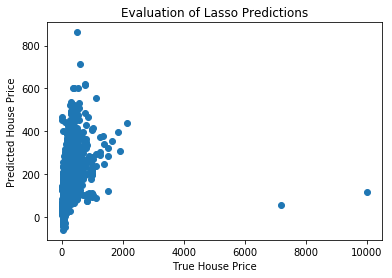

In [43]:
# let's evaluate our predictions respect to the original price
plt.scatter(y_test, model.predict(X_test))
plt.xlabel('True House Price')
plt.ylabel('Predicted House Price')
plt.title('Evaluation of Lasso Predictions')

We can see that our model is doing a pretty good job at estimating house prices.

#### Distribution of the errors

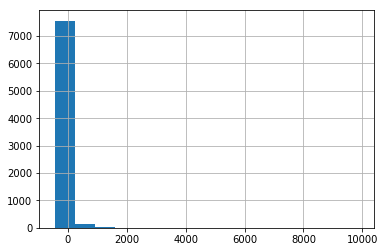

In [44]:
errors = y_test - model.predict(X_test)
errors.hist(bins=15)

The distribution of the errors follows quite closely a gaussian distribution. That suggests that our model is doing a good job as well.

### 5. Feature importance

Text(0.5, 1.0, 'Feature Importance')

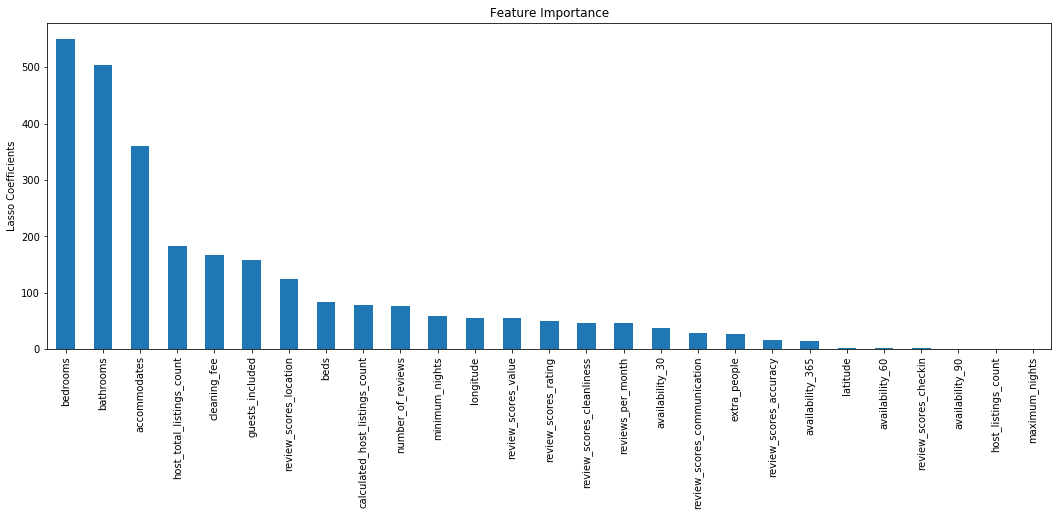

In [45]:
importance = pd.Series(np.abs(model.coef_.ravel()))
importance.index = selected_features
importance.sort_values(inplace=True, ascending=False)
importance.plot.bar(figsize=(18,6))
plt.ylabel('Lasso Coefficients')
plt.title('Feature Importance')

In [46]:
importance

bedrooms                          5.509263e+02
bathrooms                         5.033294e+02
accommodates                      3.609259e+02
host_total_listings_count         1.822648e+02
cleaning_fee                      1.662234e+02
guests_included                   1.583634e+02
review_scores_location            1.236002e+02
beds                              8.299105e+01
calculated_host_listings_count    7.887652e+01
number_of_reviews                 7.697680e+01
minimum_nights                    5.868904e+01
longitude                         5.577502e+01
review_scores_value               5.482267e+01
review_scores_rating              5.071796e+01
review_scores_cleanliness         4.658263e+01
reviews_per_month                 4.576813e+01
availability_30                   3.759175e+01
review_scores_communication       2.872867e+01
extra_people                      2.677354e+01
review_scores_accuracy            1.704918e+01
availability_365                  1.426036e+01
latitude     

-------------------------------------------------------------------------------------------------------------------

## Linear Regression 3 

### 1. Train the model

In [47]:
# Choose a class of model
from sklearn.linear_model import LinearRegression
# Choose model hyperparameters
model = LinearRegression(fit_intercept = True)
# Fit the model to the train dataset
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### 2. Result

### 3. Prediction

In [49]:
pred_train = model.predict(X_train)
print('Train prediction: ',list(pred_train[0:5]))
print('Train true label: ',list(y_train[0:5]))
print()
pred_test = model.predict(X_test)
print('Test prediction: ',list(pred_test[0:5]))
print('Test true label: ',list(y_test[0:5]))
print()
print('Average house price: ', y_train.median())

Train prediction:  [65.63420917428009, 57.294531969353145, 217.08812762326073, 121.39361316360153, 64.68963056622012]
Train true label:  [55.0, 30.0, 1000.0, 101.0, 110.0]

Test prediction:  [79.96262255842406, 77.26388128892644, 67.18164576840032, 36.434698503980556, 132.45604323968917]
Test true label:  [35.0, 28.0, 30.0, 30.0, 150.0]

Average house price:  80.0


### 4. Evaluate the model

#### R-squared

In [50]:
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
print('Train R-squared: %.4f' % train_score)
print('Test R-squared: %.4f' % test_score)

Train R-squared: 0.1950
Test R-squared: 0.1651


In [51]:
import sklearn as sk
print(sk.metrics.r2_score(y_train, pred_train))
print(sk.metrics.r2_score(y_test, pred_test))

0.19499038647318134
0.16513032202915712


#### MSE and RMSE

In [52]:
print('linear train mse: {}'.format(mean_squared_error(y_train, pred_train)))
print('linear train rmse: {}'.format(sqrt(mean_squared_error(y_train, pred_train))))
print()
print('linear test mse: {}'.format(mean_squared_error(y_test,pred_test)))
print('linear test rmse: {}'.format(sqrt(mean_squared_error(y_test, pred_test))))

linear train mse: 23966.801723876586
linear train rmse: 154.8121497941185

linear test mse: 28801.666858618304
linear test rmse: 169.71053844301568


#### Residual plot

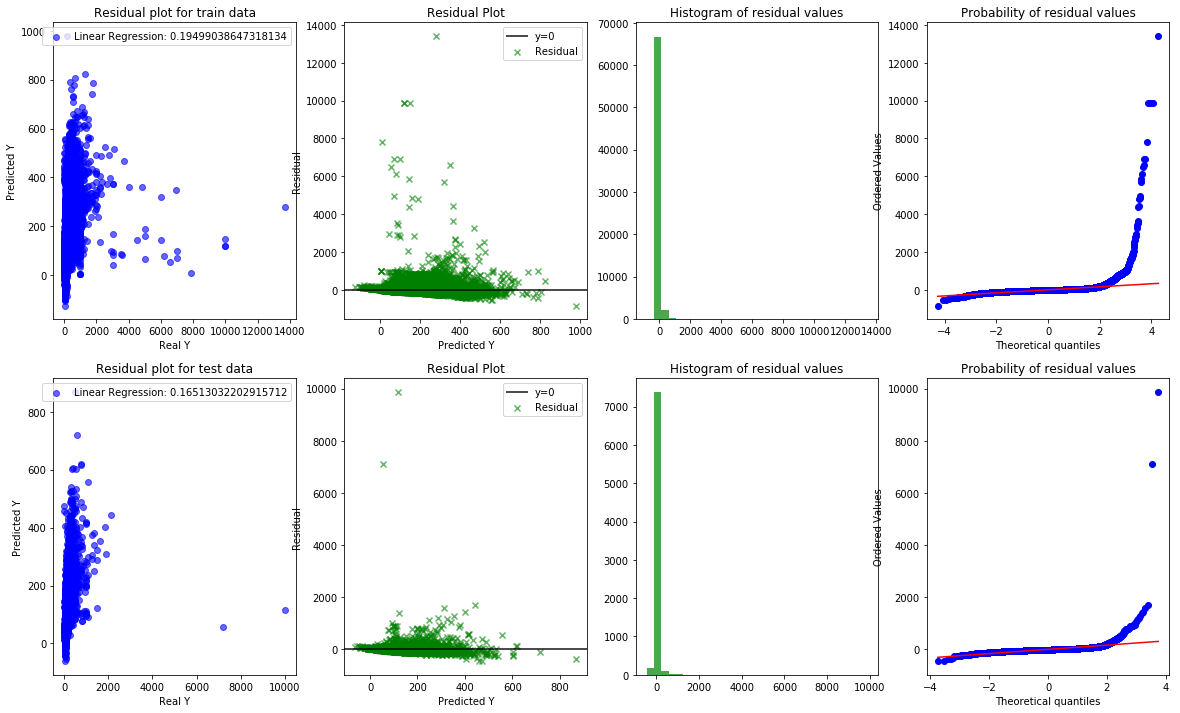

In [53]:
fig, axes = plt.subplots(2,4,figsize=(20,12))
plot_residual(axes[0][0],axes[0][1],axes[0][2],axes[0][3],pred_train,y_train,'Linear Regression: {}'.format(train_score),'Residual plot for train data')
plot_residual(axes[1][0],axes[1][1],axes[1][2],axes[1][3],pred_test,y_test,'Linear Regression: {}'.format(test_score),'Residual plot for test data')
fig.show()

### 5. Feature importance

In [54]:
# Get numerical feature importance
feature_importance = list(np.abs(model.coef_))
feature_labels = X_train.columns
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_labels, feature_importance)]
# Sort the feature importance by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importance 
[print('{:50} Importance: {}'.format(*pair)) for pair in feature_importances];

host_total_listings_count                          Importance: 343858328870441.1
host_listings_count                                Importance: 343858328870253.8
bedrooms                                           Importance: 524.33
bathrooms                                          Importance: 520.46
accommodates                                       Importance: 362.72
cleaning_fee                                       Importance: 166.25
guests_included                                    Importance: 159.33
review_scores_location                             Importance: 136.25
beds                                               Importance: 84.23
calculated_host_listings_count                     Importance: 82.86
number_of_reviews                                  Importance: 76.58
minimum_nights                                     Importance: 65.93
review_scores_value                                Importance: 52.51
longitude                                          Importance: 52.47
revi

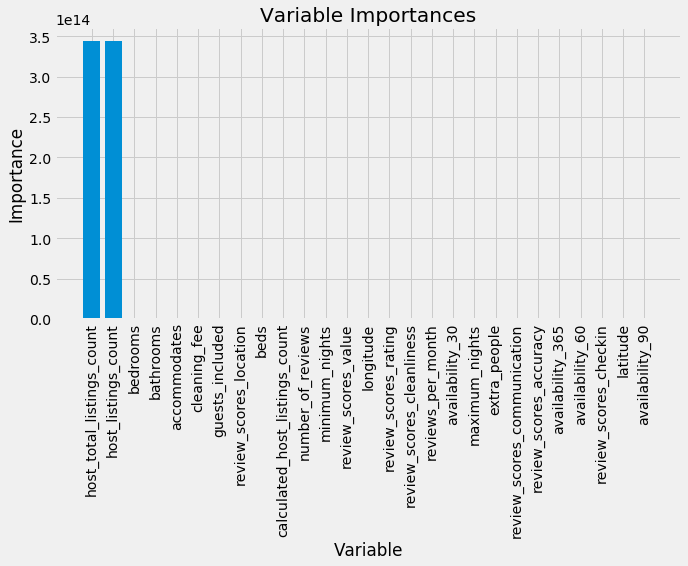

In [56]:
# Set the style
plt.style.use('fivethirtyeight')
plt.figure(figsize = (10,5))
# list of x locations for plotting
feature_labels = [pair[0] for pair in feature_importances];
x_values = list(range(len(feature_labels)))
y_values = [pair[1] for pair in feature_importances];
# Make a bar chart
plt.bar(x_values, y_values, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_labels, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

-------------------------------------------------------------------------------------------------------------------

## Linear Regression Cross Validation

### 1. Train model

In [57]:
from sklearn.model_selection import cross_val_score
model = LinearRegression()
cv_scores = cross_val_score(model, X_train, y_train, scoring = 'r2', cv = 10)

### 2. Model evaluation

In [58]:
rmse = np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv = 10))
print( "Average r2 score: ", np.round( np.mean( cv_scores ), 2 ) )
print( "Average rmse score: ", np.round( np.mean( rmse ), 2 ) )

Average r2 score:  0.22
Average rmse score:  150.24


-------------------------------------------------------------------------------------------------------------------

## Gradient Boosting Tree

### 1. Train model

In [59]:
from sklearn import ensemble
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor()
model.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

### 2. Result

In [60]:
#Default parameters our model used
model.get_params()   

{'alpha': 0.9,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'ls',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'auto',
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

### 3. Prediction

In [61]:
pred_train = model.predict(X_train)
print('Train prediction: ',list(pred_train[0:5]))
print('Train true label: ',list(y_train[0:5]))
print()
pred_test = model.predict(X_test)
print('Test prediction: ',list(pred_test[0:5]))
print('Test true label: ',list(y_test[0:5]))
print()
print('Average house price: ', y_train.median())

Train prediction:  [51.8325061263704, 47.94412680008139, 287.8468041360715, 135.60568536178917, 118.14464199331367]
Train true label:  [55.0, 30.0, 1000.0, 101.0, 110.0]

Test prediction:  [45.84627746704978, 25.38530180343475, 47.10169719702776, 27.25884440203244, 125.82995063534595]
Test true label:  [35.0, 28.0, 30.0, 30.0, 150.0]

Average house price:  80.0


### 4. Model Evaluation

#### R-squared

In [62]:
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
print('Train R-squared: %.4f' % train_score)
print('Test R-squared: %.4f' % test_score)

Train R-squared: 0.4661
Test R-squared: 0.2778


#### MSE and RMSE

In [63]:
print('linear train mse: {}'.format(mean_squared_error(y_train, pred_train)))
print('linear train rmse: {}'.format(sqrt(mean_squared_error(y_train, pred_train))))
print()
print('linear test mse: {}'.format(mean_squared_error(y_test,pred_test)))
print('linear test rmse: {}'.format(sqrt(mean_squared_error(y_test, pred_test))))

linear train mse: 15896.249619042745
linear train rmse: 126.08033002432515

linear test mse: 24915.883630742348
linear test rmse: 157.84765956688224


#### Residual plot

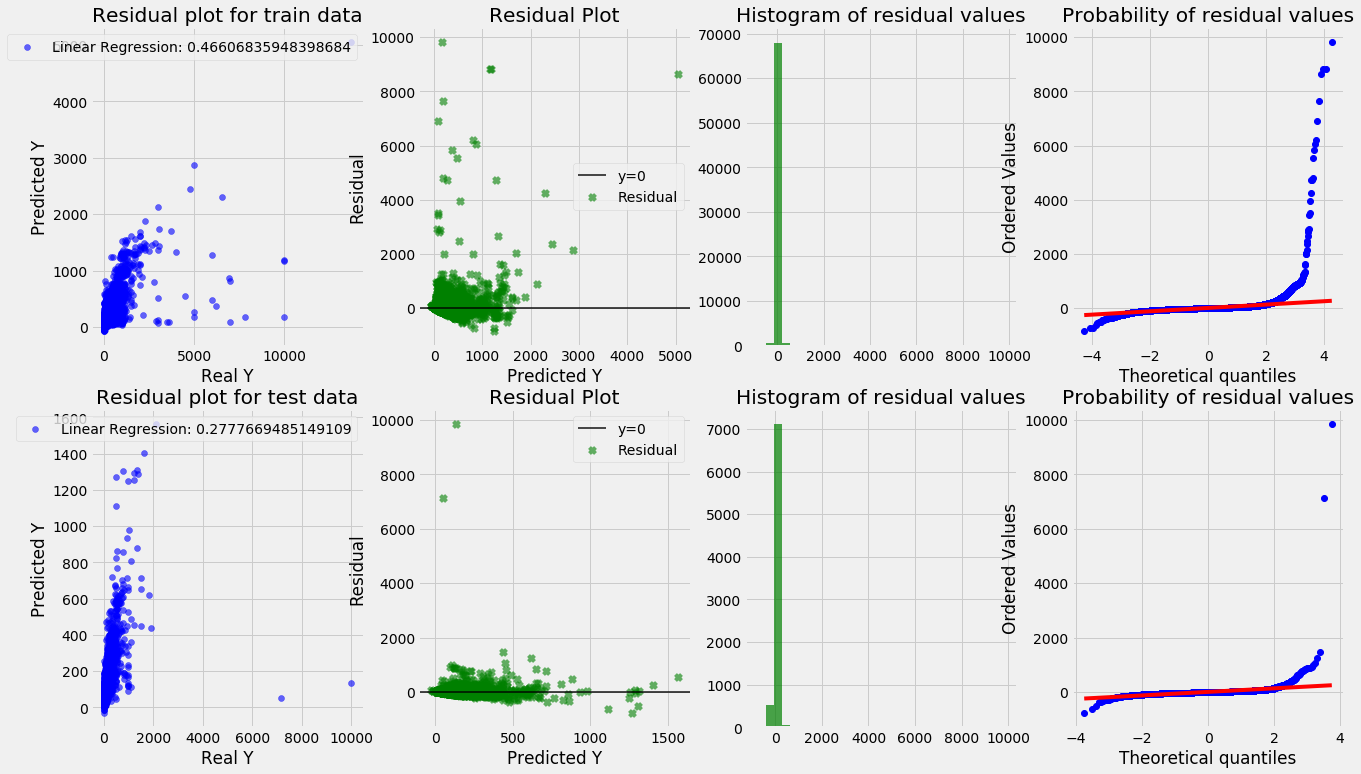

In [64]:
fig, axes = plt.subplots(2,4,figsize=(20,12))
plot_residual(axes[0][0],axes[0][1],axes[0][2],axes[0][3],pred_train,y_train,'Linear Regression: {}'.format(train_score),'Residual plot for train data')
plot_residual(axes[1][0],axes[1][1],axes[1][2],axes[1][3],pred_test,y_test,'Linear Regression: {}'.format(test_score),'Residual plot for test data')
fig.show()

### 5. Feature Importance

In [65]:
# Get numerical feature importance
feature_importance = list(np.abs(model.feature_importances_))
feature_labels = X_train.columns
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_labels, feature_importance)]
# Sort the feature importance by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importance 
[print('{:50} Importance: {}'.format(*pair)) for pair in feature_importances];

bedrooms                                           Importance: 0.18
bathrooms                                          Importance: 0.16
accommodates                                       Importance: 0.14
cleaning_fee                                       Importance: 0.09
latitude                                           Importance: 0.08
calculated_host_listings_count                     Importance: 0.06
extra_people                                       Importance: 0.05
host_total_listings_count                          Importance: 0.04
host_listings_count                                Importance: 0.04
longitude                                          Importance: 0.04
number_of_reviews                                  Importance: 0.02
availability_90                                    Importance: 0.02
minimum_nights                                     Importance: 0.02
availability_365                                   Importance: 0.01
availability_60                                 

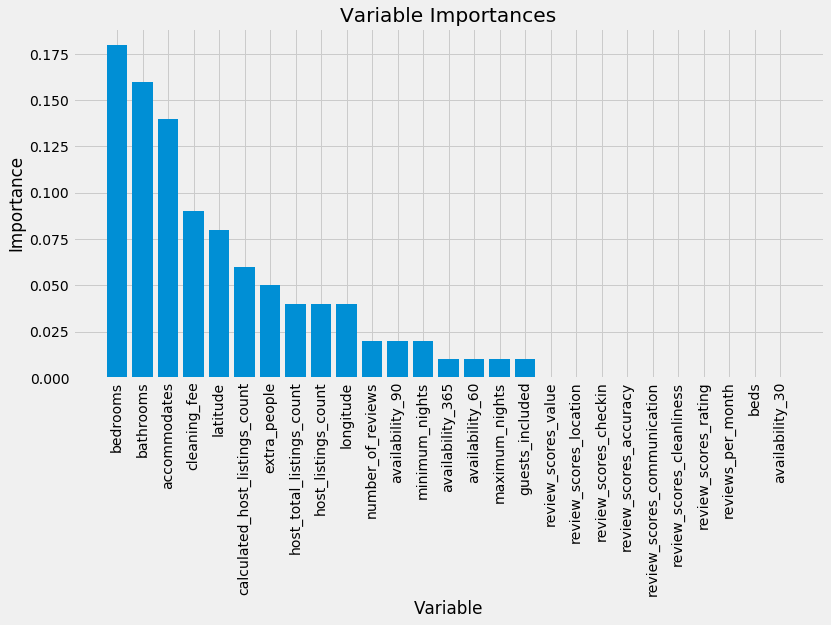

In [66]:
# Set the style
plt.style.use('fivethirtyeight')
plt.figure(figsize = (12,6))
# list of x locations for plotting
feature_labels = [pair[0] for pair in feature_importances];
x_values = list(range(len(feature_labels)))
y_values = [pair[1] for pair in feature_importances];
# Make a bar chart
plt.bar(x_values, y_values, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_labels, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

### Cross validation

In [67]:
# Cross Validation
model = GradientBoostingRegressor()
cv_scores = cross_val_score(model,X_train,y_train,scoring='r2',cv=10)
rmse = np.sqrt(-cross_val_score(model,X_train, y_train,scoring="neg_mean_squared_error", cv =10))
print('R2 score: ', cv_scores)
print('Average R2 score: ', np.round(np.mean(cv_scores),2))
print('Average RMSE score: ',np.round(np.mean(rmse),2))

R2 score:  [0.44802964 0.43019914 0.29688035 0.3761875  0.23148669 0.26896406
 0.38475538 0.21883624 0.40156033 0.53168351]
Average R2 score:  0.36
Average RMSE score:  136.31


### 6. Tuning model

In [191]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    # 'bootstrap': [True],
    'max_depth': [5, 10],
    'max_features': [5, 20],
    'min_samples_leaf': [3, 20],
    'min_samples_split': [8, 20],
    'n_estimators': [5, 50]
}
# Create a based model
model = GradientBoostingRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2) 
# Fit the grid search to the data
grid_search.fit(X_train, y_train)  
grid_search.best_params_

Fitting 3 folds for each of 32 candidates, totalling 96 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   18.6s
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:  3.0min finished


{'max_depth': 10,
 'max_features': 5,
 'min_samples_leaf': 3,
 'min_samples_split': 20,
 'n_estimators': 50}

In [196]:
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    # Retrain with the best parameters
    # model = GradientBoostingRegressor(grid_search.best_params_,  learning_rate = learning_rate,random_state = 42)
    model = GradientBoostingRegressor(n_estimators=200, learning_rate = learning_rate, max_features=5, max_depth = 10, random_state = 42)
    model.fit(X_train, y_train)    
    print('Learning rate: ',learning_rate)
    # Predicting label
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    print('Train R-squared: %.4f' % train_score)
    print('Test R-squared: %.4f' % test_score)

Train R-squared: 0.9455
Test R-squared: 0.2958
Train R-squared: 0.9700
Test R-squared: 0.2703
Train R-squared: 0.9886
Test R-squared: 0.2134
Train R-squared: 0.9958
Test R-squared: 0.1204
Train R-squared: 0.9975
Test R-squared: -0.0453
Train R-squared: 0.9978
Test R-squared: -0.0335


In [ ]:
# Retrain with the best parameters 
model = GradientBoostingRegressor(n_estimators=200, learning_rate = 0.05, max_features=5, max_depth = 10,random_state = 42)
model.fit(X_train,y_train)
# Predicting label
pred_train = gb_op.predict(X_train)
pred_test = gb_op.predict(X_test) 

## Random Forest

### 1. Train model

In [181]:
from sklearn import ensemble
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

### 2. Result

In [182]:
#Default parameters our model used
model.get_params() 

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### 3. Prediction

In [183]:
pred_train = model.predict(X_train)
print('Train prediction: ',list(pred_train[0:5]))
print('Train true label: ',list(y_train[0:5]))
print()
pred_test = model.predict(X_test)
print('Test prediction: ',list(pred_test[0:5]))
print('Test true label: ',list(y_test[0:5]))
print()
print('Average house price: ', y_train.median())

Train prediction:  [55.0, 31.4, 929.0, 98.3, 132.0]
Train true label:  [55.0, 30.0, 1000.0, 101.0, 110.0]

Test prediction:  [65.2, 35.7, 92.6, 28.9, 62.8]
Test true label:  [35.0, 28.0, 30.0, 30.0, 150.0]

Average house price:  80.0


### 4. Model Evaluation

#### R-squared

In [184]:
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
print('Train R-squared: %.4f' % train_score)
print('Test R-squared: %.4f' % test_score)

Train R-squared: 0.8791
Test R-squared: -0.2151


#### MSE, RMSE

In [185]:
print('linear train mse: {}'.format(mean_squared_error(y_train, pred_train)))
print('linear train rmse: {}'.format(sqrt(mean_squared_error(y_train, pred_train))))
print()
print('linear test mse: {}'.format(mean_squared_error(y_test,pred_test)))
print('linear test rmse: {}'.format(sqrt(mean_squared_error(y_test, pred_test))))

linear train mse: 3599.139008593345
linear train rmse: 59.99282464256326

linear test mse: 41919.12494745037
linear test rmse: 204.74160531618963


#### Residual plot

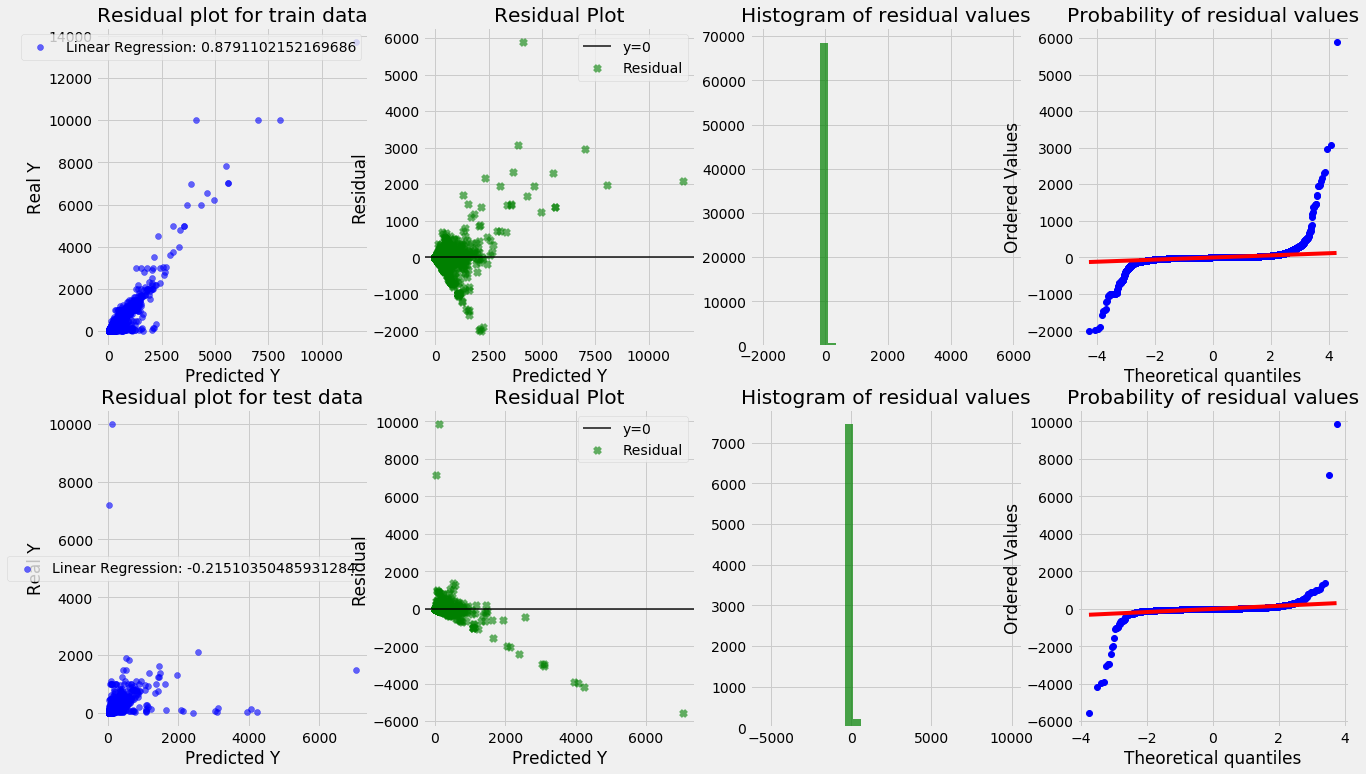

In [186]:
fig, axes = plt.subplots(2,4,figsize=(20,12))
plot_residual(axes[0][0],axes[0][1],axes[0][2],axes[0][3],pred_train,y_train,'Linear Regression: {}'.format(train_score),'Residual plot for train data')
plot_residual(axes[1][0],axes[1][1],axes[1][2],axes[1][3],pred_test,y_test,'Linear Regression: {}'.format(test_score),'Residual plot for test data')
fig.show()

### 5. Feature Importance 

In [187]:
# Get numerical feature importance
feature_importance = list(model.feature_importances_)
feature_labels = X_train.columns
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_labels, feature_importance)]
# Sort the feature importance by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importance 
[print('{:50} Importance: {}'.format(*pair)) for pair in feature_importances];

latitude                                           Importance: 0.14
bedrooms                                           Importance: 0.11
bathrooms                                          Importance: 0.09
cleaning_fee                                       Importance: 0.07
longitude                                          Importance: 0.07
host_listings_count                                Importance: 0.06
minimum_nights                                     Importance: 0.06
extra_people                                       Importance: 0.06
accommodates                                       Importance: 0.06
host_total_listings_count                          Importance: 0.05
number_of_reviews                                  Importance: 0.04
availability_365                                   Importance: 0.04
calculated_host_listings_count                     Importance: 0.04
reviews_per_month                                  Importance: 0.02
beds                                            

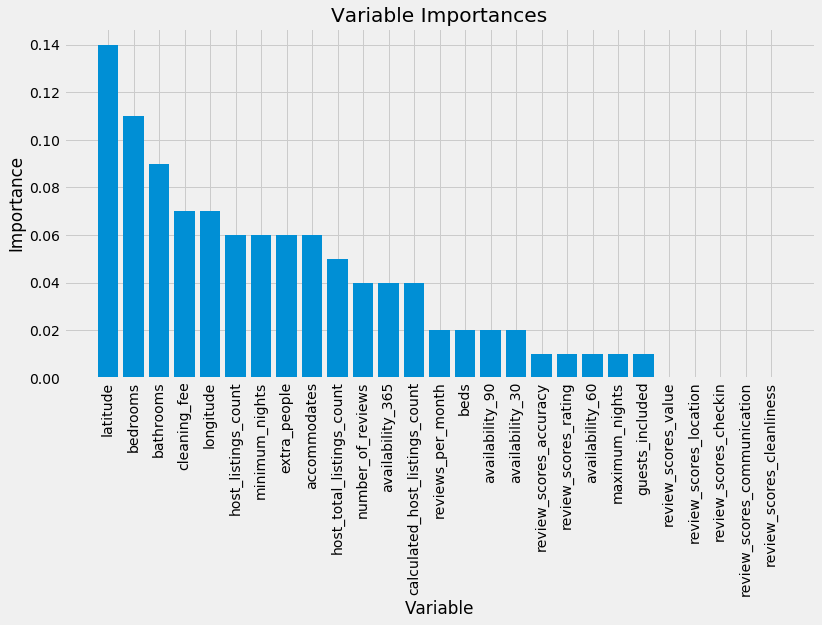

In [188]:
# Set the style
plt.style.use('fivethirtyeight')
plt.figure(figsize = (12,6))
# list of x locations for plotting
feature_labels = [pair[0] for pair in feature_importances];
x_values = list(range(len(feature_labels)))
y_values = [pair[1] for pair in feature_importances];
# Make a bar chart
plt.bar(x_values, y_values, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_labels, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

### Cross Validation

In [ ]:
# Cross Validation
model = RandomForestRegressor(n_estimators = 500,learning_rate=0.05, max_depth=3,max_features=3,min_samples_leaf=20,min_samples_split=2)
cv_scores = cross_val_score(model,X_train,y_train,scoring='r2',cv=10)
rmse = np.sqrt(-cross_val_score(model,X_train, y_train,scoring="neg_mean_squared_error", cv =10))
print('R2 score: ', cv_scores)
print('Average R2 score: ', np.round(np.mean(cv_scores),2))
print('Average RMSE score: ',np.round(np.mean(rmse),2))

### 6. Tuning model

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    # 'bootstrap': [True],
    'max_depth': [5, 10],
    'max_features': [5, 20],
    'min_samples_leaf': [3, 20],
    'min_samples_split': [8, 20],
    'n_estimators': [5, 50]
}
# Create a based model
model = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2) 
# Fit the grid search to the data
grid_search.fit(X_train, y_train)  
grid_search.best_params_

In [ ]:
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    # Retrain with the best parameters
    # model = RandomForestRegressor(grid_search.best_params_,  learning_rate = learning_rate,random_state = 42)
    model = RandomForestRegressor(n_estimators=200, learning_rate = learning_rate, max_features=5, max_depth = 10, random_state = 42)
    model.fit(X_train, y_train)    
    print('Learning rate: ',learning_rate)
    # Predicting label
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    print('Train R-squared: %.4f' % train_score)
    print('Test R-squared: %.4f' % test_score)

In [ ]:
# Retrain with the best parameters 
model = RandomForestRegressor(n_estimators=200, learning_rate = 0.05, max_features=5, max_depth = 10,random_state = 42)
model.fit(X_train,y_train)
# Predicting label
pred_train = gb_op.predict(X_train)
pred_test = gb_op.predict(X_test) 

## XGBoost

### 1. Train model

In [199]:
# Choose a class of model
import xgboost 
model = XGBRegressor()
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

### 2. Result

In [200]:
# Print Default parameters of the model used
model.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'importance_type': 'gain',
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'reg:linear',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': True,
 'subsample': 1}

### Prediction

In [201]:
pred_train = model.predict(X_train)
print('Train prediction: ',list(pred_train[0:5]))
print('Train true label: ',list(y_train[0:5]))
print()
pred_test = model.predict(X_test)
print('Test prediction: ',list(pred_test[0:5]))
print('Test true label: ',list(y_test[0:5]))
print()
print('Average house price: ', y_train.median())

Train prediction:  [53.39237, 48.20872, 293.5839, 130.52249, 115.88191]
Train true label:  [55.0, 30.0, 1000.0, 101.0, 110.0]

Test prediction:  [47.583496, 25.676502, 47.407394, 28.569443, 118.80122]
Test true label:  [35.0, 28.0, 30.0, 30.0, 150.0]

Average house price:  80.0


### Model Evaluation

In [202]:
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
print('Train R-squared: %.4f' % train_score)
print('Test R-squared: %.4f' % test_score)

Train R-squared: 0.4434
Test R-squared: 0.2708


In [203]:
print('linear train mse: {}'.format(mean_squared_error(y_train, pred_train)))
print('linear train rmse: {}'.format(sqrt(mean_squared_error(y_train, pred_train))))
print()
print('linear test mse: {}'.format(mean_squared_error(y_test,pred_test)))
print('linear test rmse: {}'.format(sqrt(mean_squared_error(y_test, pred_test))))

linear train mse: 16572.603946162628
linear train rmse: 128.73462605749327

linear test mse: 25154.841514273994
linear test rmse: 158.60277902443573


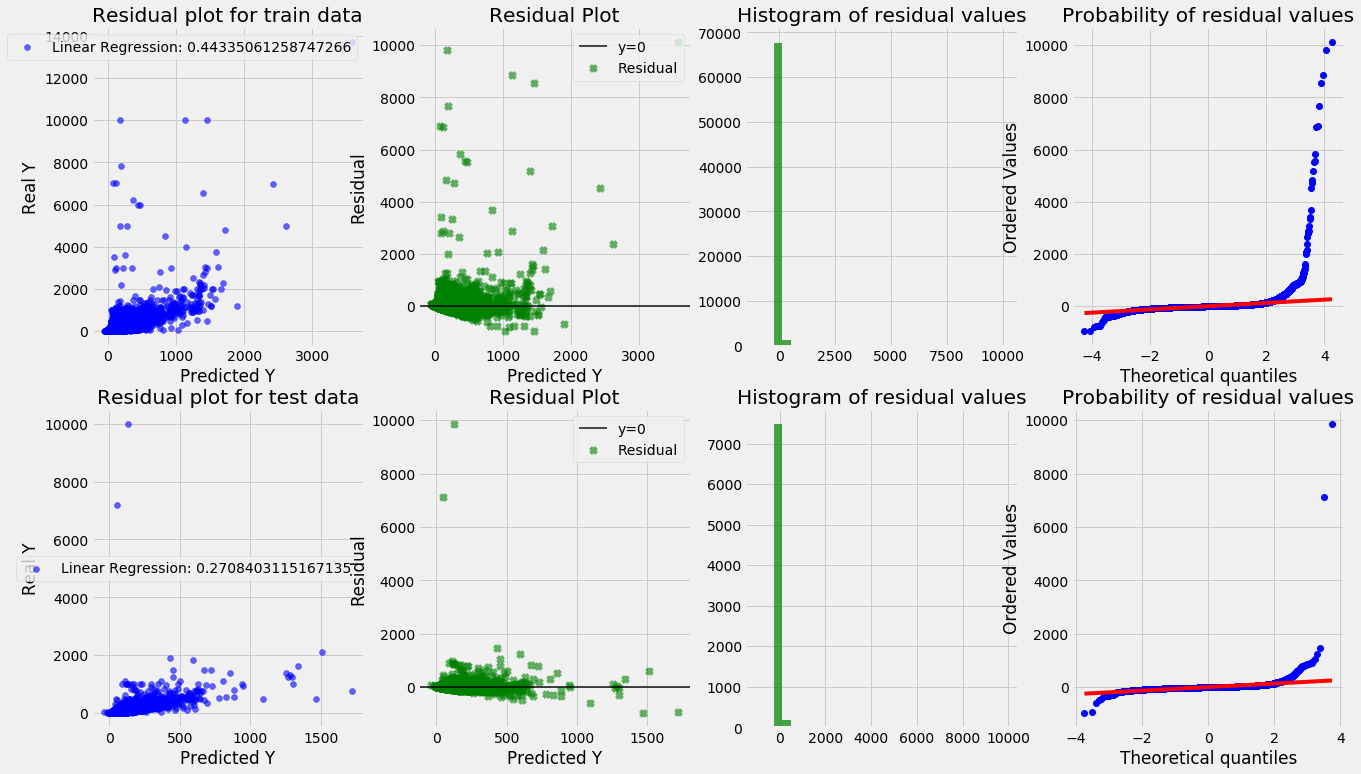

In [204]:
fig, axes = plt.subplots(2,4,figsize=(20,12))
plot_residual(axes[0][0],axes[0][1],axes[0][2],axes[0][3],pred_train,y_train,'Linear Regression: {}'.format(train_score),'Residual plot for train data')
plot_residual(axes[1][0],axes[1][1],axes[1][2],axes[1][3],pred_test,y_test,'Linear Regression: {}'.format(test_score),'Residual plot for test data')
fig.show()

In [205]:
# Get numerical feature importance
feature_importance = list(model.feature_importances_)
feature_labels = X_train.columns
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_labels, feature_importance)]
# Sort the feature importance by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importance 
[print('{:50} Importance: {}'.format(*pair)) for pair in feature_importances];

bedrooms                                           Importance: 0.2199999988079071
calculated_host_listings_count                     Importance: 0.10000000149011612
host_total_listings_count                          Importance: 0.09000000357627869
accommodates                                       Importance: 0.09000000357627869
bathrooms                                          Importance: 0.05999999865889549
number_of_reviews                                  Importance: 0.05999999865889549
cleaning_fee                                       Importance: 0.05000000074505806
maximum_nights                                     Importance: 0.03999999910593033
extra_people                                       Importance: 0.03999999910593033
latitude                                           Importance: 0.03999999910593033
availability_365                                   Importance: 0.029999999329447746
availability_60                                    Importance: 0.029999999329447746
rev

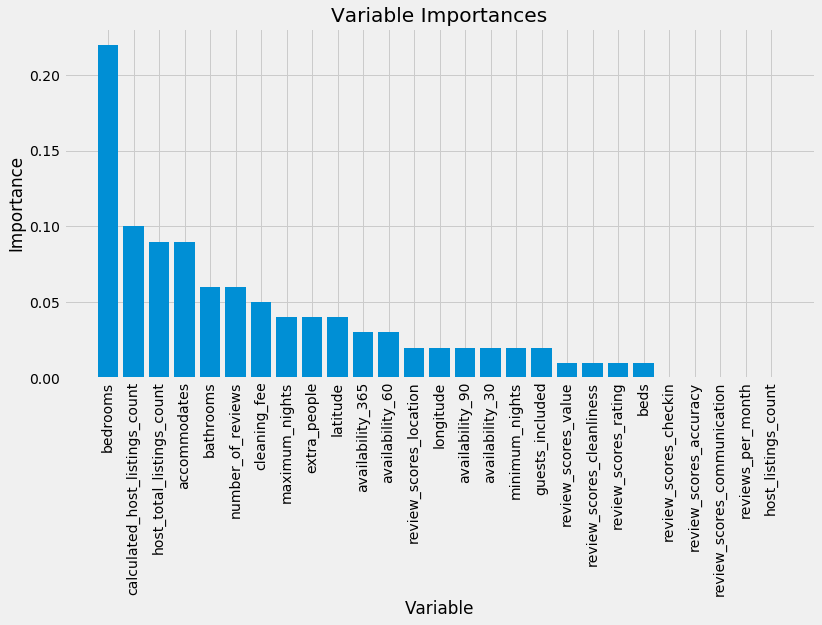

In [206]:
# Set the style
plt.style.use('fivethirtyeight')
plt.figure(figsize = (12,6))
# list of x locations for plotting
feature_labels = [pair[0] for pair in feature_importances];
x_values = list(range(len(feature_labels)))
y_values = [pair[1] for pair in feature_importances];
# Make a bar chart
plt.bar(x_values, y_values, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_labels, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

In [207]:
# Cross Validation
model = XGBRegressor(n_estimators = 500,learning_rate=0.05, max_depth=3,max_features=3,min_samples_leaf=20,min_samples_split=2)
cv_scores = cross_val_score(model,X_train,y_train,scoring='r2',cv=10)
rmse = np.sqrt(-cross_val_score(model,X_train, y_train,scoring="neg_mean_squared_error", cv =10))
print('R2 score: ', cv_scores)
print('Average R2 score: ', np.round(np.mean(cv_scores),2))
print('Average RMSE score: ',np.round(np.mean(rmse),2))

KeyboardInterrupt: 

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    # 'bootstrap': [True],
    'max_depth': [5, 10],
    'max_features': [5, 20],
    'min_samples_leaf': [3, 20],
    'min_samples_split': [8, 20],
    'n_estimators': [5, 50]
}
# Create a based model
model = XGBRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2) 
# Fit the grid search to the data
grid_search.fit(X_train, y_train)  
grid_search.best_params_

## Model

1. Train the model
2. Result
3. Prediction
4. Evaluate the model
  + MSE and RMSE
  + Visualize the predicted output and true label
  + Distribution of the errors
5. Feature importance